In [41]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
athletes = pd.read_csv('Athletes.csv')
teams = pd.read_csv('Teams.csv')
medals = pd.read_csv('Medals.csv')
coaches = pd.read_csv('Coaches.csv')
gender = pd.read_csv('EntriesGender.csv')

In [3]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [4]:
coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,C�te d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [5]:
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [6]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [7]:
gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [8]:
#Checking for missing values

In [10]:
athletes.isnull().sum()

Name          0
NOC           0
Discipline    0
dtype: int64

In [11]:
coaches.isnull().sum()

Name            0
NOC             0
Discipline      0
Event         145
dtype: int64

In [12]:
teams.isnull().sum()

Name          0
Discipline    0
NOC           0
Event         0
dtype: int64

In [13]:
medals.isnull().sum()

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

In [14]:
#Checking coaches dataframe with missing values
coaches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        394 non-null    object
 1   NOC         394 non-null    object
 2   Discipline  394 non-null    object
 3   Event       249 non-null    object
dtypes: object(4)
memory usage: 12.4+ KB


In [15]:
#since 37% is missing data we will leave the data like that since it would spoil the data

## Athletes Analysis


In [16]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [19]:
# athletes summary
athletes.describe()

,Name,NOC,Discipline
count,11085,11085,11085
unique,11062,206,46
top,PALTRINIERI Gregorio,United States of America,Athletics
freq,2,615,2068


In [20]:
athletes_by_country = athletes.groupby('NOC')

In [28]:
#number of countries that participated
athletes['NOC'].nunique()

206

In [24]:
athletes_by_country.count().sort_values(by=['Name'],ascending=False).head(20)

,Name,Discipline
NOC,,
United States of America,615,615
Japan,586,586
Australia,470,470
People's Republic of China,401,401
Germany,400,400
France,377,377
Canada,368,368
Great Britain,366,366
Italy,356,356


In [38]:
# Top 20 countries with most athletes
most_athletes = athletes_by_country.count().sort_values(by=['Name'],ascending=False).head(20)

<BarContainer object of 20 artists>

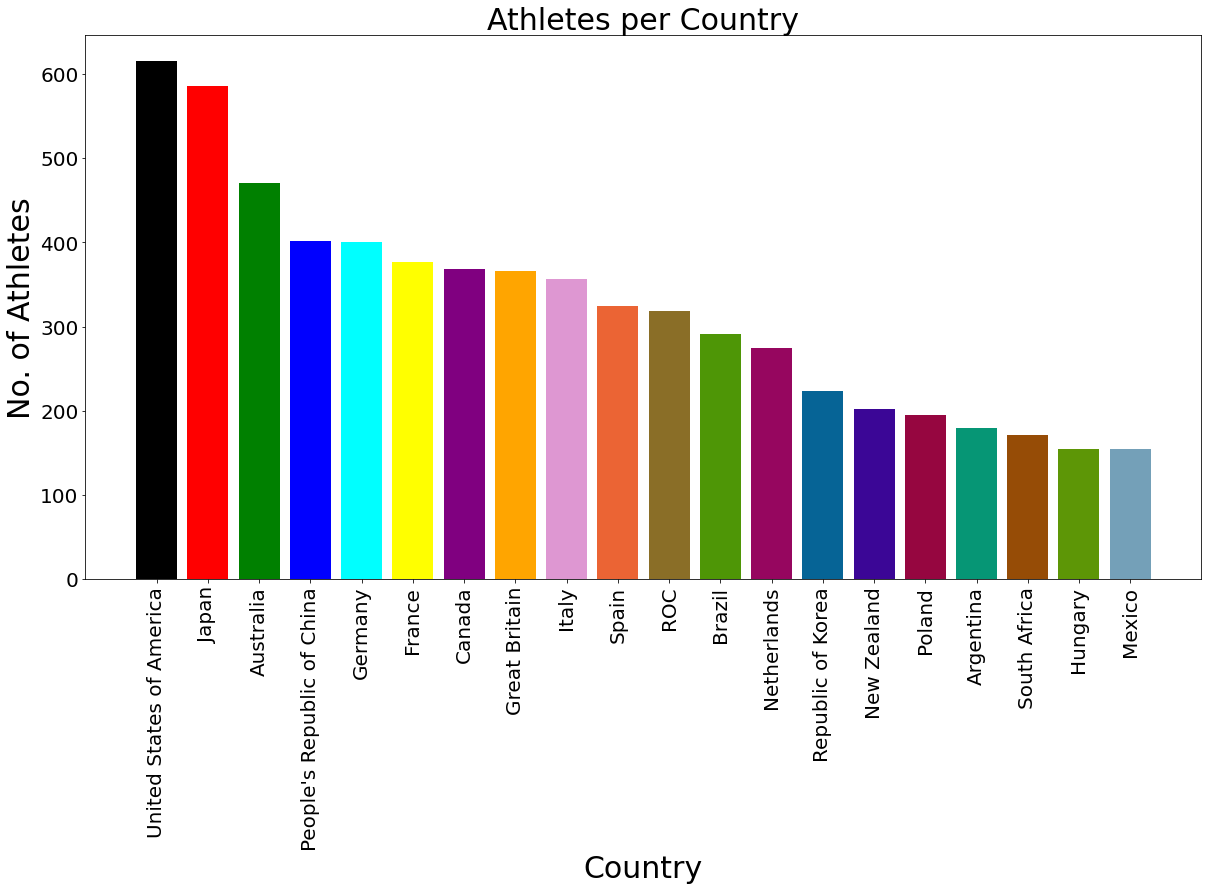

In [98]:
color=['black', 'red', 'green', 'blue', 'cyan','yellow','purple','orange','#de97d2','#eb6434','#8a6e27','#4e9606','#96065f',
       '#066496','#3b0696','#960640','#069675','#964c06','#5d9606','#74a0b8']
x = most_athletes.index
y = most_athletes['Name']
plt.figure(figsize=(20,10))
plt.title('Athletes per Country',fontsize=30)
plt.xlabel('Country',fontsize=30)
plt.ylabel('No. of Athletes',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.bar(x,y,color=color)


In [47]:
#Discipline with the most athletes

In [50]:
athletes['Discipline'].unique()

array(['Cycling Road', 'Artistic Gymnastics', 'Rowing', 'Basketball',
       'Handball', 'Swimming', 'Karate', 'Wrestling',
       'Rhythmic Gymnastics', 'Baseball/Softball', 'Athletics',
       'Artistic Swimming', 'Judo', 'Shooting', 'Table Tennis',
       'Football', 'Taekwondo', 'Fencing', 'Badminton', 'Boxing',
       'Weightlifting', 'Archery', 'Diving', 'Beach Volleyball',
       'Sailing', 'Hockey', 'Trampoline Gymnastics', 'Marathon Swimming',
       'Triathlon', 'Canoe Slalom', 'Water Polo', 'Surfing',
       'Canoe Sprint', 'Cycling BMX Racing', 'Rugby Sevens', 'Volleyball',
       'Equestrian', 'Tennis', 'Cycling Track', 'Golf', 'Skateboarding',
       'Modern Pentathlon', 'Cycling Mountain Bike', '3x3 Basketball',
       'Cycling BMX Freestyle', 'Sport Climbing'], dtype=object)

In [51]:
#Total number of Disciplines in the games
athletes['Discipline'].nunique()

46

In [55]:
athletes_per_discipline = athletes.groupby('Discipline').count().sort_values(by=['Name'],ascending=False)

<BarContainer object of 46 artists>

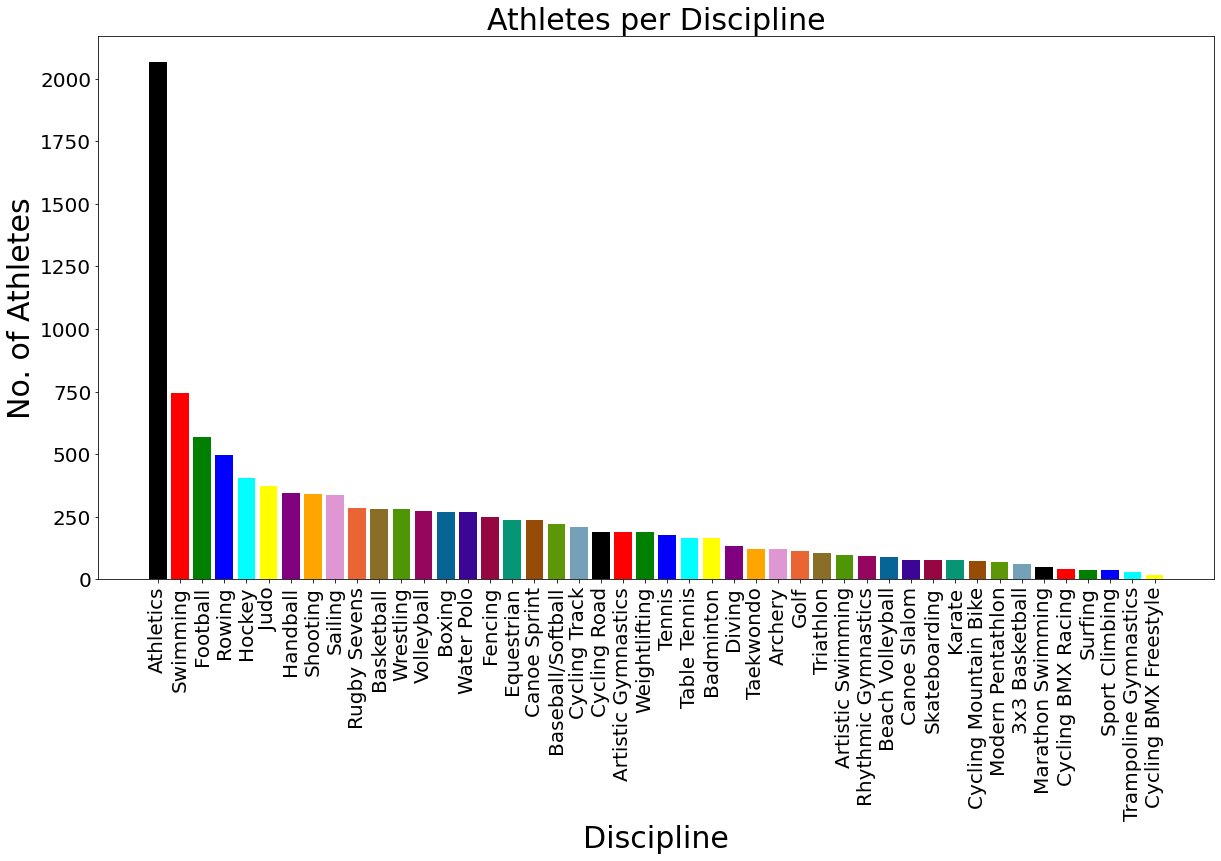

In [97]:
x = athletes_per_discipline.index
y = athletes_per_discipline['Name']
plt.figure(figsize=(20,10))
plt.title('Athletes per Discipline',fontsize=30)
plt.xlabel('Discipline',fontsize=30)
plt.ylabel('No. of Athletes',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.bar(x,y,color=color)

In [57]:
# Athletics has the most athletes and cycling BMX freestyle the least

## Coaches Analysis

In [58]:
coaches.describe()

,Name,NOC,Discipline,Event
count,394,394,394,249
unique,381,61,9,6
top,FUJIKI Mayuko,Japan,Basketball,Men
freq,2,35,74,94


In [59]:
coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,C�te d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [61]:
#country with the most coaches
coach_per_country = coaches.groupby('NOC').count().sort_values(by=['Name'],ascending=False).head(20)

<BarContainer object of 20 artists>

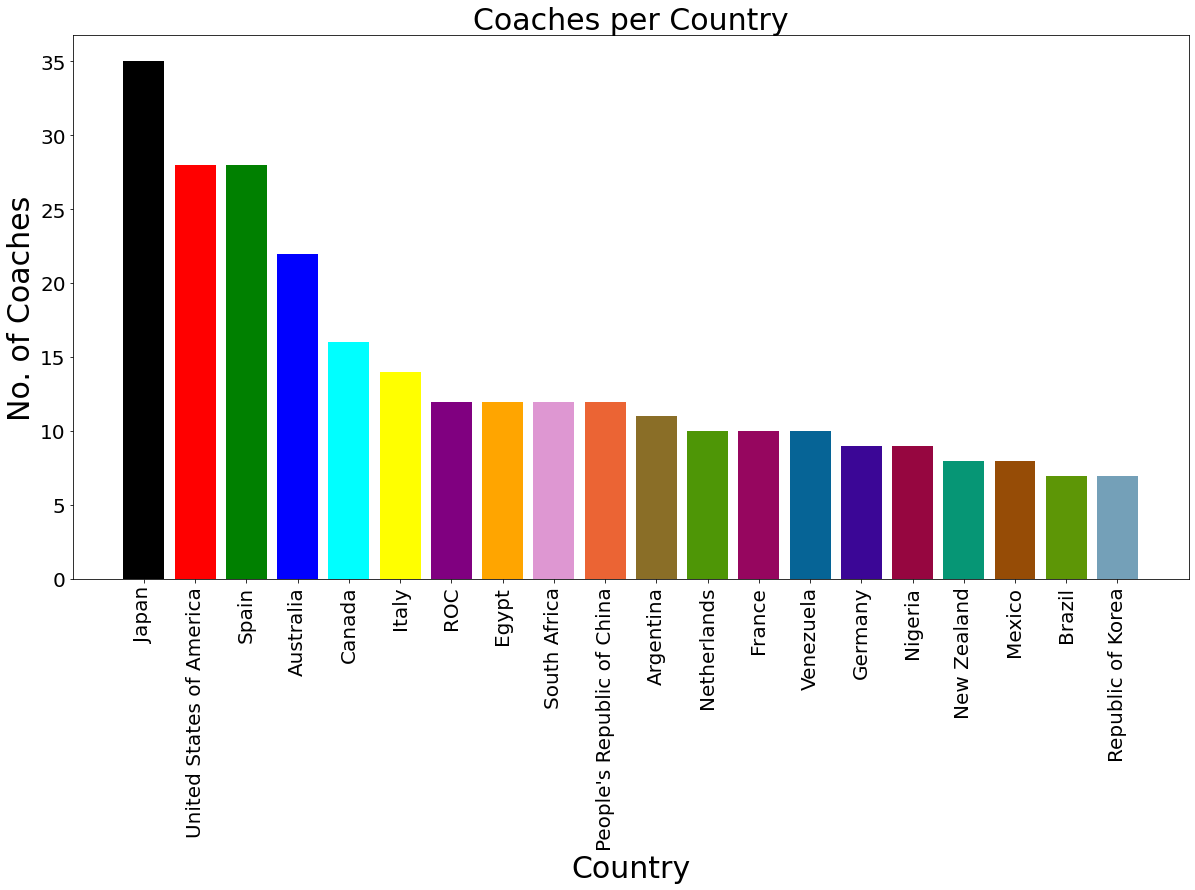

In [96]:
#Top 20 countries with most coaches from 61
x = coach_per_country.index
y = coach_per_country['Name']
plt.figure(figsize=(20,10))
plt.title('Coaches per Country',fontsize=30)
plt.xlabel('Country',fontsize=30)
plt.ylabel('No. of Coaches',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.bar(x,y,color=color)

In [63]:
#Japan has more coaches

In [64]:
#number of coaches per discipline
coach_per_discipline = coaches.groupby('Discipline').count().sort_values(by=['Name'],ascending=False)

<BarContainer object of 9 artists>

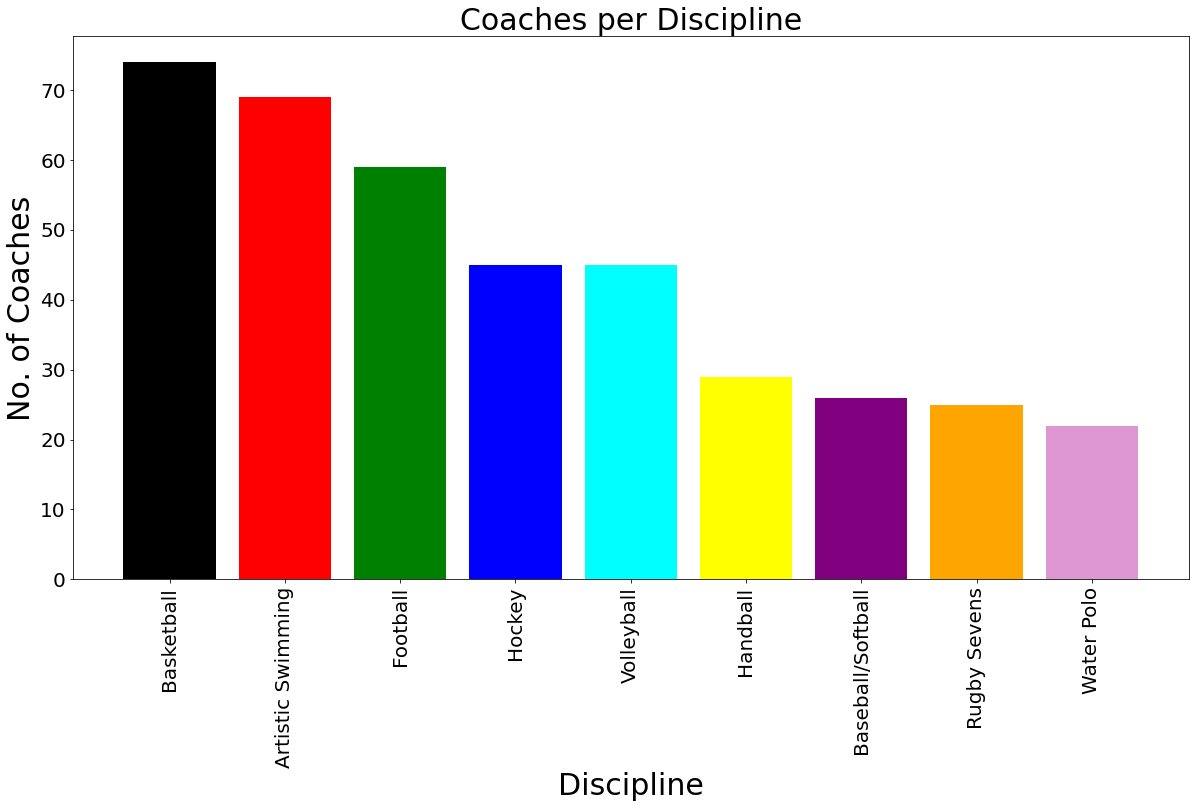

In [95]:
x = coach_per_discipline.index
y = coach_per_discipline['Name']
plt.figure(figsize=(20,10))
plt.title('Coaches per Discipline',fontsize=30)
plt.xlabel('Discipline',fontsize=30)
plt.ylabel('No. of Coaches',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.bar(x,y,color=color)

In [68]:
#basketball has more coaches.

## Gender Analysis

In [70]:
gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [71]:
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


([<matplotlib.patches.Wedge at 0x658661d1f0>,
 [Text(0.06897206410285361, 1.0978355315680906, 'Females'),
  Text(-0.068972064102854, -1.0978355315680906, 'Males')],
 [Text(0.03762112587428379, 0.598819380855322, '48%'),
  Text(-0.037621125874284, -0.598819380855322, '52%')])

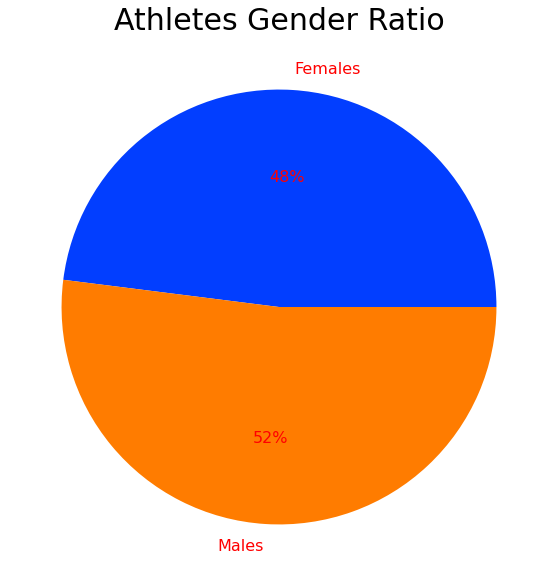

In [99]:
#athletes per gender
data = [gender['Female'].sum(),gender['Male'].sum()]
labels = ['Females','Males']
colors = sns.color_palette('bright')
plt.figure(figsize=(20,10))
plt.title('Athletes Gender Ratio',fontsize=30)
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%',textprops = {'color': 'Red','fontsize':16})

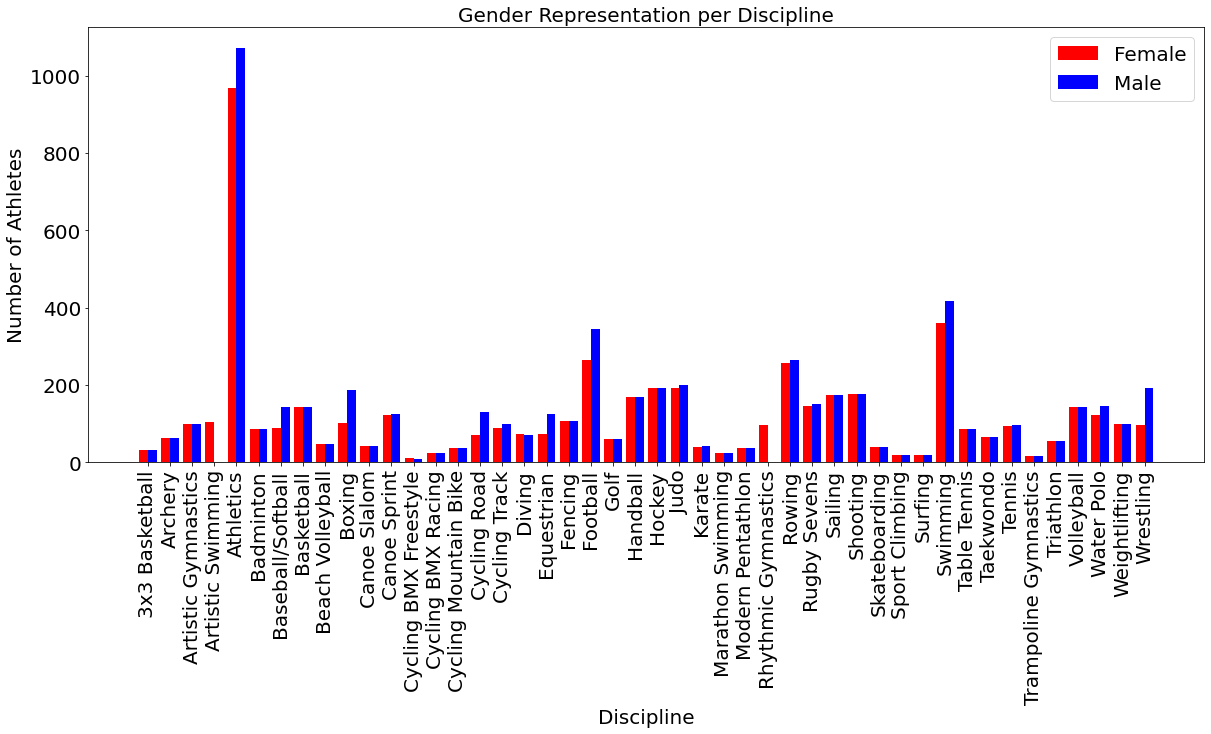

In [112]:
Disc = gender.groupby('Discipline')
x = [Discipline for Discipline, df in Disc]
female = gender.Female
male = gender.Male
plt.figure(figsize=(20,8))
X_axis = np.arange(len(x))
plt.bar(X_axis - 0.2, female, 0.4, label = 'Female',color='red')
plt.bar(X_axis + 0.2, male, 0.4, label = 'Male' ,color='blue')
plt.title('Gender Representation per Discipline',fontsize = 20)
plt.xlabel("Discipline",fontsize=20)
plt.ylabel("Number of Athletes",fontsize=20)
plt.xticks(X_axis,x,rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

In [90]:
teams.groupby('NOC').count()

,Name,Discipline,Event
NOC,,,
Angola,1,1,1
Argentina,10,10,10
Australia,35,35,35
Austria,5,5,5
Azerbaijan,1,1,1
...,...,...,...
United States of America,47,47,47
Uzbekistan,1,1,1
Venezuela,1,1,1


<BarContainer object of 40 artists>

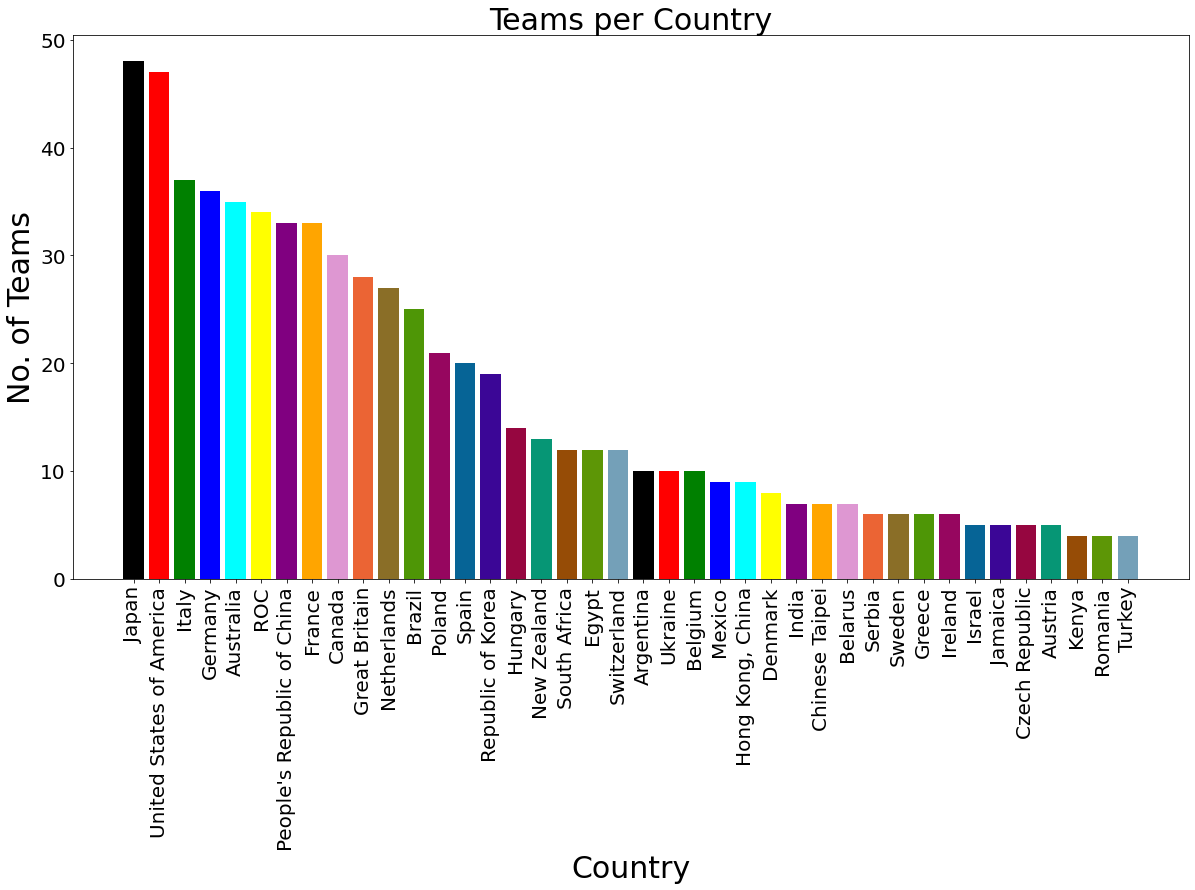

In [94]:
#Top 40 countries with more teams in the olympics
team_per_country = teams.groupby('NOC').count().sort_values(by=['Name'],ascending=False).head(40)
x = team_per_country.index
y = team_per_country['Name']
plt.figure(figsize=(20,10))
plt.title('Teams per Country',fontsize=30)
plt.xlabel('Country',fontsize=30)
plt.ylabel('No. of Teams',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.bar(x,y,color=color)

## Medals Analysis

In [100]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [101]:
medals.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [106]:
goldDf = medals.sort_values(by=['Gold'],ascending=False).head(40)

<BarContainer object of 40 artists>

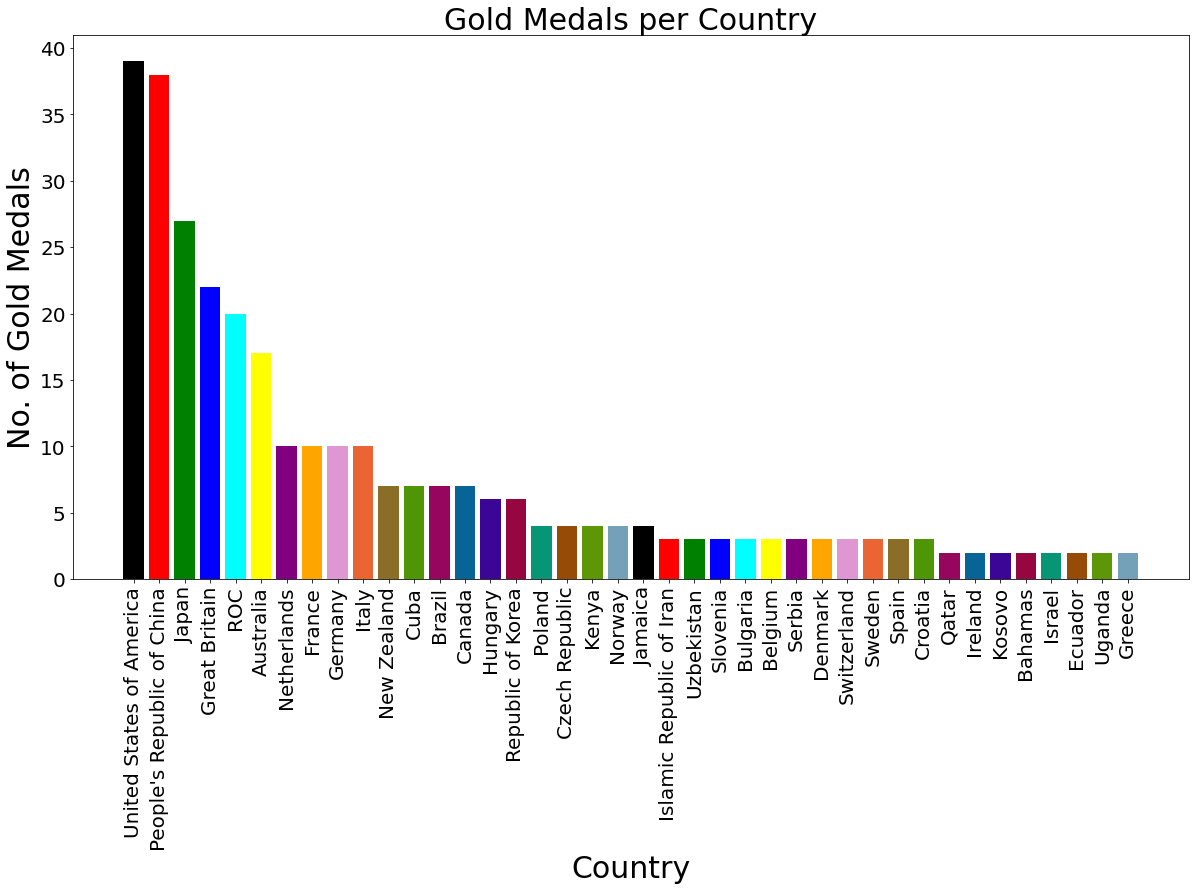

In [108]:
x = goldDf['Team/NOC']
y = goldDf['Gold']
plt.figure(figsize=(20,10))
plt.title('Gold Medals per Country',fontsize=30)
plt.xlabel('Country',fontsize=30)
plt.ylabel('No. of Gold Medals',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.bar(x,y,color=color)

<BarContainer object of 40 artists>

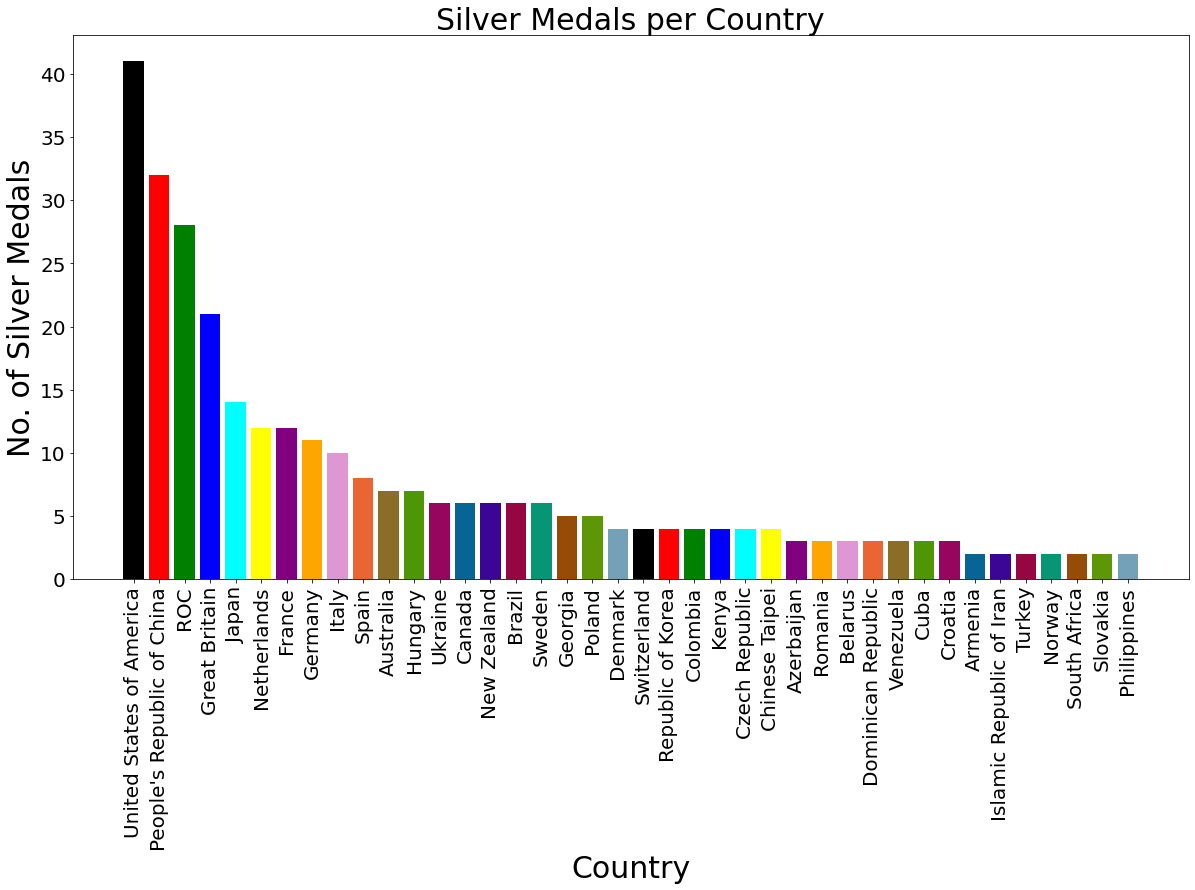

In [109]:
silverDf = medals.sort_values(by=['Silver'],ascending=False).head(40)
x = silverDf['Team/NOC']
y = silverDf['Silver']
plt.figure(figsize=(20,10))
plt.title('Silver Medals per Country',fontsize=30)
plt.xlabel('Country',fontsize=30)
plt.ylabel('No. of Silver Medals',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.bar(x,y,color=color)

<BarContainer object of 40 artists>

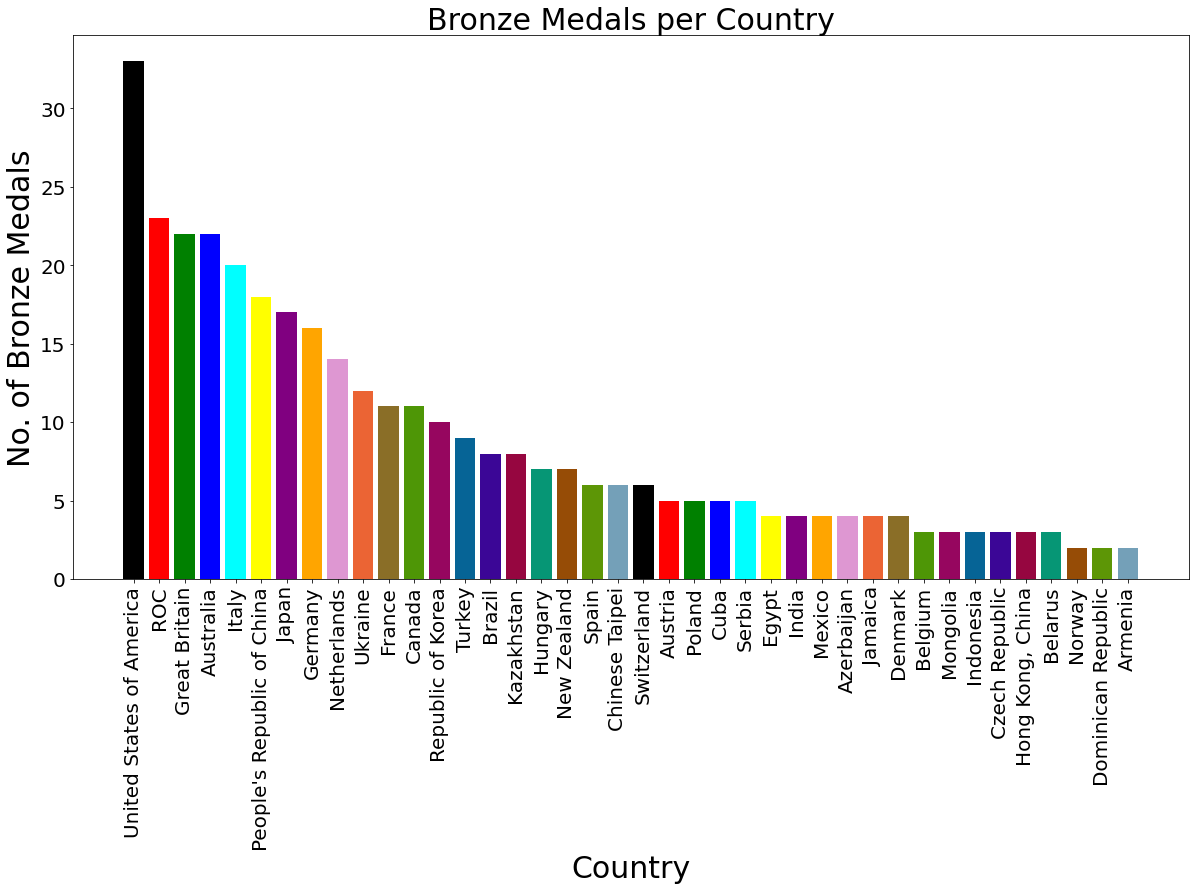

In [110]:
BronzeDf = medals.sort_values(by=['Bronze'],ascending=False).head(40)
x = BronzeDf['Team/NOC']
y = BronzeDf['Bronze']
plt.figure(figsize=(20,10))
plt.title('Bronze Medals per Country',fontsize=30)
plt.xlabel('Country',fontsize=30)
plt.ylabel('No. of Bronze Medals',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.bar(x,y,color=color)